Testing packing.py
January 15 2025 - Dan Espinosa

The general idea is to create the addresses and the packed clause representations to fill the clause table and address translation table with.
Am refactoring 



In [2]:
import packing as pck

In [4]:
# 4queens == p cnf 16 84
test_mems = pck.create_literal_memberships("./uf50-218/uf50-1000.cnf")

[[], [25, 46, 63, 83, 101, 106, 147, 149, 179], [2, 5, 31, 53, 65, 69, 100, 135, 156, 165, 180, 186, 191], [21, 23, 60, 124, 135, 191, 197], [9, 92, 93, 104, 186], [1, 8, 14, 48, 92, 160, 209], [5, 14, 159, 191, 192], [7, 26, 41, 61, 150, 161, 166, 175, 194, 209], [42, 214], [6, 13, 16, 19, 151, 158, 213], [9, 74, 85, 97, 99, 106, 183], [4, 8, 10, 99, 105, 131, 144, 156, 184, 210, 214], [78, 95, 158, 172, 176, 189], [62, 114, 126, 128, 129, 146, 192], [40, 47, 95, 166], [21, 59, 60, 87, 138, 159], [11, 54, 56, 72, 80, 82, 90, 152], [18, 96, 211], [48, 55, 100, 131], [16, 29, 77, 130, 147, 216], [0, 55, 118, 124, 147, 188], [3, 50, 62, 79, 83, 122, 132, 144, 155, 217], [3, 35, 47, 71, 80, 89, 91, 130, 132, 148, 186], [17, 22, 109, 114, 148, 159, 167, 180, 195, 203, 204], [6, 26, 30, 91, 94, 103, 203], [86, 140, 178, 213], [15, 58, 145, 146, 169, 176], [19, 41, 72, 78, 206], [38, 61, 118, 137, 175], [7, 36, 170, 212], [10, 51, 68, 133, 185, 211], [28, 103, 112, 117, 174, 176, 188], [69, 

In [5]:
#     Returns:
#       packed_literal_array: an array of the form [[[literal_a, literal_b], [membership of literal_a, membership of literal_b]], ...]
#       masks: a list of tuples indicating the start and end positions for each literal within the packed array (1-based indexing)

test_packs, test_masks = pck.packing_algorithm(test_mems)
print(test_masks)

[(0, 0), (300, 308), (32, 44), (617, 623), (369, 373), (604, 610), (382, 386), (156, 165), (15, 16), (591, 597), (578, 584), (102, 112), (455, 460), (565, 571), (152, 155), (468, 473), (387, 394), (71, 73), (166, 169), (481, 486), (494, 499), (142, 151), (88, 98), (74, 84), (552, 558), (179, 182), (507, 512), (395, 399), (407, 411), (192, 195), (520, 525), (539, 545), (526, 532), (533, 538), (374, 381), (205, 208), (287, 295), (419, 423), (85, 87), (218, 221), (546, 551), (274, 282), (559, 564), (231, 234), (572, 577), (585, 590), (244, 247), (261, 269), (598, 603), (257, 260), (611, 616), (361, 368), (513, 519), (431, 435), (443, 447), (500, 506), (248, 256), (624, 629), (487, 493), (129, 138), (474, 480), (30, 31), (636, 641), (349, 356), (461, 467), (448, 454), (436, 442), (99, 101), (337, 344), (45, 46), (424, 430), (412, 418), (325, 332), (270, 273), (648, 653), (283, 286), (113, 115), (313, 320), (58, 59), (235, 243), (642, 647), (222, 230), (116, 125), (296, 299), (400, 406), (6

In [6]:
# Returns:
#     packed_literal_array: an array of the form [[[literal_a, literal_b], [membership of literal_a, membership of literal_b]], ...]
#     masks: a list of tuples indicating the start and end positions for each literal within the packed array (1-based indexing)

test_packs, test_masks = pck.packing_algorithm_20_as_max(test_mems)

In [8]:
# Convert packed literal array and masks to uint32 list format.
# Args:
# packed_literal_array (list): The packed literal array.
# masks (list): The masks indicating start and end positions.
# depth (int): The depth of the uint32 array.
# Returns:
# uint32_list (list): The uint32 list representation of packed literals.

# Example:
# literal address: 0x00 (depth = 2048 * 2 -> width = 12 bits)
# literal clause table membership address: 11'b00000000001
# literal clause table mask: 20b'11111000000000000000
# Then the resulting data stored in 0th index of the array would be
# 31'b00000000001_11111000000000000000 
uint32_packs = pck.convert_to_uint32_list(test_packs, test_masks)
print(uint32_packs)

[99614742, 7340070, 89128986, 62914609, 1048578, 71303173, 91226118, 80740420, 88080385, 16777219, 23068689, 38797334, 22020099, 69206051, 10485764, 78643208, 84934668, 93323318, 60817408, 100663314, 20971523, 13631538, 6291463, 17825818, 101711873, 25165849, 97517570, 29360158, 96469023, 35651650, 90177561, 39845978, 83886117, 44040252, 81788939, 47185939, 57671687, 50331710, 48234553, 75497539, 41943044, 77594635, 36700175, 85983259, 79691778, 92274701, 74448942, 94371892, 70254615, 95420461, 65011781, 98566226, 52428820, 102760477, 34603042, 3145771, 15728651, 5242934, 87031822, 27263011, 73400341, 28311591, 72351749, 37748754, 68157489, 54526005, 67108911, 55574580, 66060312, 11534382, 61865997, 14680120, 59768882, 18874420, 56623132, 19922978, 53477384, 26214433, 32505925, 30408774, 31457308, 33554535, 24117254, 40894490, 12582974, 42991730, 9437193, 45088842, 8388614, 46137357, 4194305, 49283080, 2097173, 51380247, 103809033, 58720289, 82837612, 63963246, 76546145, 0, 0, 0, 0, 0,

<BarContainer object of 99 artists>

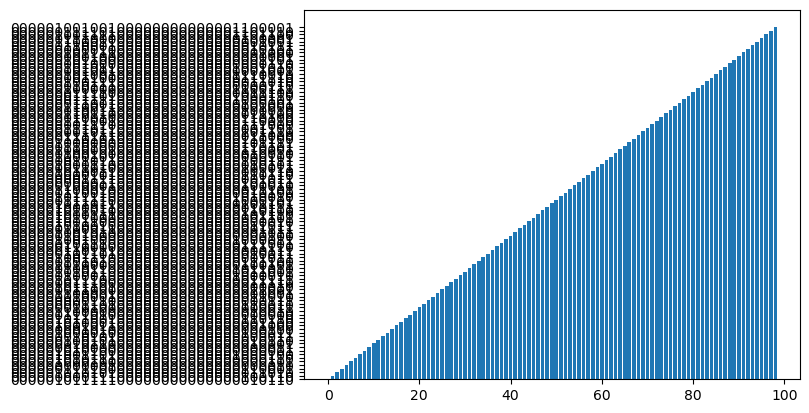

In [9]:
import matplotlib.pyplot as plt
# literal address: 0x00 (depth = 2048 * 2 -> width = 12 bits)
# literal clause table membership address: 11'b00000000001
# literal clause table mask: 20b'11111000000000000000
# Then the resulting data stored in 0th index of the array would be
# 31'b00000000001_11111000000000000000 
plotter = [f"{i:032b}" for i in uint32_packs if i != 0] 
plt.bar(range(len(plotter)),plotter)

In [10]:
len(plotter[1])

32

In [11]:
import pytest

def test_packing_algorithm_normal_case():
    input_data = [[], [1, 2], [3, 4, 5], [6, 7], [8, 9, 10, 11]]
    expected_output = (
        [[[4, 2], [8, 9, 10, 11, 1, 2]], [[3, 1], [3, 4, 5, 6, 7]]],
        [(0, 0), (4, 5), (2, 3), (8, 9), (0, 3)]
    )
    assert pck.packing_algorithm(input_data) == expected_output

def test_packing_algorithm_empty_input():
    input_data = [[]]
    expected_output = ([], [(0, 0)])
    assert pck.packing_algorithm(input_data) == expected_output

def test_packing_algorithm_single_element():
    input_data = [[], [1, 2, 3]]
    expected_output = ([[[1], [1, 2, 3]]], [(0, 0), (0, 2)])
    assert pck.packing_algorithm(input_data) == expected_output

def test_packing_algorithm_max_size_20():
    input_data = [[], [1]*20, [2, 3], [4, 5]]
    expected_output = (
        [[[1], [1]*20], [[3, 2], [2, 3, 4, 5]]],
        [(0, 0), (0, 19), (22, 23), (20, 21)]
    )
    assert pck.packing_algorithm(input_data) == expected_output

def test_packing_algorithm_exceeds_max_size():
    input_data = [[], [1]*21, [2, 3]]
    with pytest.raises(ValueError):
        pck.packing_algorithm(input_data)

def test_packing_algorithm_all_elements_packed_separately():
    input_data = [[], [1]*20, [2]*20, [3]*20]
    expected_output = (
        [[[1], [1]*20], [[2], [2]*20], [[3], [3]*20]],
        [(0, 0), (0, 19), (20, 39), (40, 59)]
    )
    assert pck.packing_algorithm(input_data) == expected_output

# Tests for pck.packing_algorithm_20_as_max
def test_packing_algorithm_20_as_max_normal_case():
    input_data = [[], [1, 2], [3, 4, 5], [6, 7], [8, 9, 10, 11]]
    expected_output = (
        [[[4, 2], [8, 9, 10, 11, 1, 2]], [[3, 1], [3, 4, 5, 6, 7]]],
        [(0, 0), (4, 5), (2, 3), (8, 9), (0, 3)]
    )
    assert pck.packing_algorithm_20_as_max(input_data) == expected_output

def test_packing_algorithm_20_as_max_empty_input():
    input_data = [[]]
    expected_output = ([], [(0, 0)])
    assert pck.packing_algorithm_20_as_max(input_data) == expected_output

def test_packing_algorithm_20_as_max_single_element():
    input_data = [[], [1, 2, 3]]
    expected_output = ([[[1], [1, 2, 3]]], [(0, 0), (0, 2)])
    assert pck.packing_algorithm_20_as_max(input_data) == expected_output

def test_packing_algorithm_20_as_max_max_size_20():
    input_data = [[], [1]*20, [2, 3], [4, 5]]
    expected_output = (
        [[[1], [1]*20], [[3, 2], [2, 3, 4, 5]]],
        [(0, 0), (0, 19), (22, 23), (20, 21)]
    )
    assert pck.packing_algorithm_20_as_max(input_data) == expected_output

def test_packing_algorithm_20_as_max_exceeds_max_size():
    input_data = [[], [1]*21, [2, 3]]
    with pytest.raises(ValueError):
        pck.packing_algorithm_20_as_max(input_data)

def test_packing_algorithm_20_as_max_all_elements_packed_separately():
    input_data = [[], [1]*20, [2]*20, [3]*20]
    expected_output = (
        [[[1], [1]*20], [[2], [2]*20], [[3], [3]*20]],
        [(0, 0), (0, 19), (20, 39), (40, 59)]
    )
    assert pck.packing_algorithm_20_as_max(input_data) == expected_output
